In [17]:
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from utils.data_loader import load_crime_dataset

import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Location of stored dataset
dataset_path = Path('../datasets/chicago-crime-data.csv')

if dataset_path.exists():
    print(f"File found: {dataset_path.name}")
else:
    load_crime_dataset()

File found: chicago-crime-data.csv


In [19]:
# Converting result into dataframe
results_df = pd.read_csv(dataset_path)
results_df.head(4)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,:@computed_region_awaf_s7ux
0,13647521,JH488715,2024-10-27T00:00:00.000,045XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20.0,14,1145677.0,1919561.0,2024,2024-11-03T15:42:31.000,41.935271,-87.740045,"{'latitude': '41.935270542', 'longitude': '-87...",7.0
1,13644362,JH484829,2024-10-27T00:00:00.000,015XX N LOCKWOOD AVE,0710,THEFT,THEFT FROM MOTOR VEHICLE,STREET,False,False,...,25.0,06,1140747.0,1909683.0,2024,2024-11-03T15:42:31.000,41.908256,-87.758406,"{'latitude': '41.908256441', 'longitude': '-87...",4.0
2,13646926,JH486773,2024-10-27T00:00:00.000,039XX W CORNELIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,21.0,14,1149691.0,1922983.0,2024,2024-11-03T15:42:31.000,41.944584,-87.725204,"{'latitude': '41.944583619', 'longitude': '-87...",27.0
3,13643859,JH484227,2024-10-27T00:00:00.000,066XX N OLYMPIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,9.0,08B,1125451.0,1943751.0,2024,2024-11-03T15:42:31.000,42.002011,-87.813839,"{'latitude': '42.002010603', 'longitude': '-87...",34.0


In [20]:
# Dropping redundant columns
results_df.drop(columns=results_df.columns[22:], axis = 1, inplace= True)

In [21]:
# Check duplicate rows
print(f"Duplicated rows detected: {sum(results_df.duplicated())}")

Duplicated rows detected: 0


In [22]:
# Check missing values
results_df.isna().sum()

id                        0
case_number               0
date                      0
block                     0
iucr                      0
primary_type              0
description               0
location_description    304
arrest                    0
domestic                  0
beat                      0
district                  0
ward                      0
community_area            1
fbi_code                  0
x_coordinate             34
y_coordinate             34
year                      0
updated_on                0
latitude                 34
longitude                34
location                 34
dtype: int64

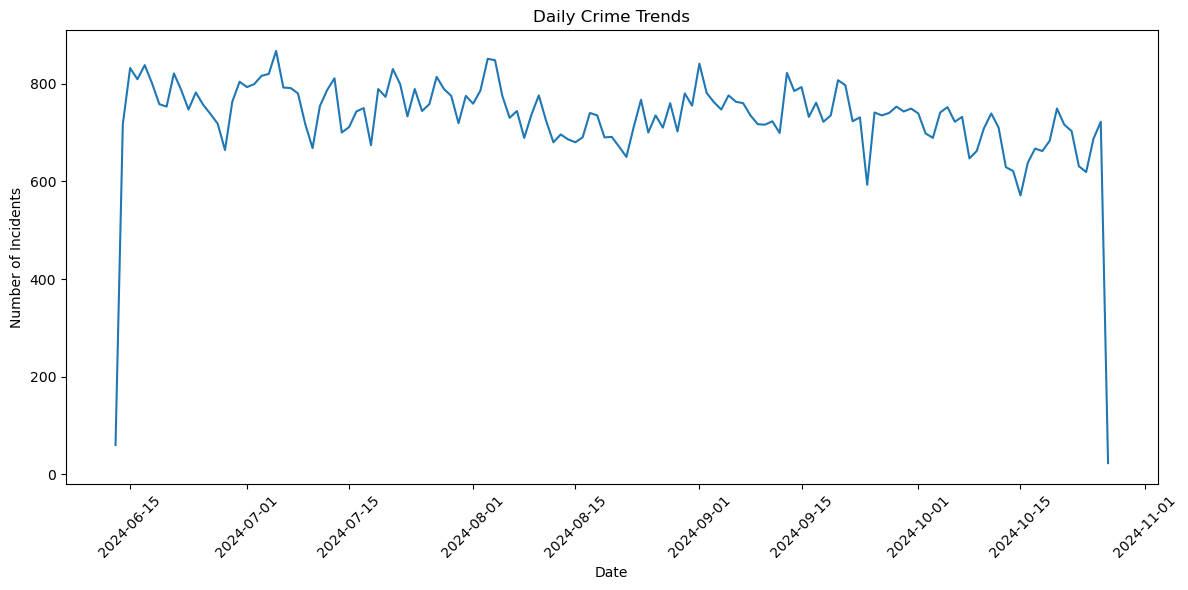

In [25]:

# Convert the 'date' column to datetime format
results_df['date'] = pd.to_datetime(results_df['date'])

# Group by the date to count the number of incidents
daily_trends = results_df.groupby(results_df['date'].dt.date).size()

# Plot the daily crime trends
plt.figure(figsize=(12, 6))
daily_trends.plot()
plt.title('Daily Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Extract the year from the 'date' column
results_df['year'] = results_df['date'].dt.year

# Find the unique years
unique_years = results_df['year'].unique()

# Print the unique years and the total count
print(f"Unique years: {sorted(unique_years)}")
print(f"Total number of unique years: {len(unique_years)}")


Unique years: [2024]
Total number of unique years: 1
